In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load the Excel file
file_path = "C:/Users/Galindo/Desktop/recursos_enginyeria_2.xlsx"  
df = pd.read_excel(file_path, engine="openpyxl")
df.head()

,Ubicació,Edifici,Tipus de recurs,Descripció del recurs,Observacions,Característiques específiques,Valor característi ques específiques,Superfície Centre Gestor,Metres
0,QC/0029,Q,"ala d'actes, reunions i junte",Sala de juntes,NaN,Aire condicionat,S í,61.0,61.0
1,NaN,NaN,NaN,NaN,NaN,Canó projecció fix,S í,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,Connexió xarxa,S í,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,Connexió xarxa sense fil,S í,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,Megafonia,S í,NaN,NaN


In [5]:
df = df.drop("Metres", axis=1)
df = df.drop("Edifici", axis=1)
df = df.drop("Observacions", axis=1)
df = df.drop("Descripció del recurs", axis=1)
df = df.drop("Superfície Centre Gestor", axis=1)
df = df.iloc[:-1]  # Drop last row
df = df.dropna(subset=['Característiques específiques'])  # Drop rows with null values in the "Característiques específiques" column, since if they have nothing, they are of no use to us
df = df.rename(columns={"Valor característi ques específiques": "Valor característiques específiques"})
df["Valor característiques específiques"] = df["Valor característiques específiques"].apply(lambda x: x if isinstance(x, int) else 1)  # Erase all non-integers, this column is mostly confirming the existence of the device, we only need the amount
df["Característiques específiques"] = df["Característiques específiques"].replace("Connexió a la xarxa (nombre)", "Connexió xarxa")
df["Característiques específiques"] = df["Característiques específiques"].replace("Ordinador", "Ordinador(s)")

df.head()

,Ubicació,Tipus de recurs,Característiques específiques,Valor característiques específiques
0,QC/0029,"ala d'actes, reunions i junte",Aire condicionat,1
1,NaN,NaN,Canó projecció fix,1
2,NaN,NaN,Connexió xarxa,1
3,NaN,NaN,Connexió xarxa sense fil,1
4,NaN,NaN,Megafonia,1


In [6]:
ordinador_rows = df[df['Característiques específiques'] == 'Ordinador(s)'].index
ordinadors_nombre_rows = df[df['Característiques específiques'] == 'Ordinadors (nombre)'].index
for row in ordinadors_nombre_rows:
    above_row = row - 1  # Find the row above that matches "Ordinador(s)"
    if above_row in ordinador_rows:
        df.at[above_row, 'Valor característiques específiques'] += df.at[row, 'Valor característiques específiques']  # Sum the values
df = df[df['Característiques específiques'] != 'Ordinadors (nombre)']  # Drop these rows, since they specify sth that can be specified in another row, ergo useless (the rows I mean jejeje)

df.head()

,Ubicació,Tipus de recurs,Característiques específiques,Valor característiques específiques
0,QC/0029,"ala d'actes, reunions i junte",Aire condicionat,1
1,NaN,NaN,Canó projecció fix,1
2,NaN,NaN,Connexió xarxa,1
3,NaN,NaN,Connexió xarxa sense fil,1
4,NaN,NaN,Megafonia,1


In [8]:
unique_values = df["Característiques específiques"].unique()  # Locate the unique values of the column
# Take the relevant ones, leaving the meaningless behind
values_to_keep = ["Aire condicionat", "Canó projecció fix", "Connexió xarxa", "Connexió xarxa sense fil", "Megafonia", "Ordinador", "Retroprojector", "Vídeo", "Videoconferència", "Connexió a la xarxa (nombre)", "Micròfons de taula", "Televisor", "Impressora làser", "Impressora matricial", "Impressora", "Ordinadors (nombre)"] 
condition = df["Característiques específiques"].isin(values_to_keep) | df["Ubicació"].notna()  # Drop the rows of the meaningless values, making sure that if one means erasing an important column, this is kept
df_filtered = df[condition]  # Apply the condition above to the dataset

df_filtered.head()

,Ubicació,Tipus de recurs,Característiques específiques,Valor característiques específiques
0,QC/0029,"ala d'actes, reunions i junte",Aire condicionat,1
1,NaN,NaN,Canó projecció fix,1
2,NaN,NaN,Connexió xarxa,1
3,NaN,NaN,Connexió xarxa sense fil,1
4,NaN,NaN,Megafonia,1


In [10]:
df_no_blanks = df_filtered.copy()
df_no_blanks[df_no_blanks.columns[:2]] = df_filtered[df.columns[:2]].fillna(method='ffill')
df_no_blanks[df_no_blanks.columns[-1]] = df_filtered[df.columns[-1]].fillna(method='ffill')
df_no_blanks.head()

C:\Users\Galindo\AppData\Local\Temp\ipykernel_13700\2727622387.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_no_blanks[df_no_blanks.columns[:2]] = df_filtered[df.columns[:2]].fillna(method='ffill')
C:\Users\Galindo\AppData\Local\Temp\ipykernel_13700\2727622387.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_no_blanks[df_no_blanks.columns[-1]] = df_filtered[df.columns[-1]].fillna(method='ffill')


,Ubicació,Tipus de recurs,Característiques específiques,Valor característiques específiques
0,QC/0029,"ala d'actes, reunions i junte",Aire condicionat,1
1,QC/0029,"ala d'actes, reunions i junte",Canó projecció fix,1
2,QC/0029,"ala d'actes, reunions i junte",Connexió xarxa,1
3,QC/0029,"ala d'actes, reunions i junte",Connexió xarxa sense fil,1
4,QC/0029,"ala d'actes, reunions i junte",Megafonia,1


In [ ]:
# Save the data
output_file_path = "C:/Users/Galindo/Desktop/recursos_enginyeria_cleansed.xlsx" 
df_filtered.to_excel(output_file_path, index=False, engine="openpyxl")

output_file_path_2 = "C:/Users/Galindo/Desktop/recursos_enginyeria_cleansed_no_blanks.xlsx" 
df_no_blanks.to_excel(output_file_path_2, index=False, engine="openpyxl")

       Valor característiques específiques
count                           352.000000
mean                              1.224432
std                               1.866842
min                               1.000000
25%                               1.000000
50%                               1.000000
75%                               1.000000
max                              21.000000


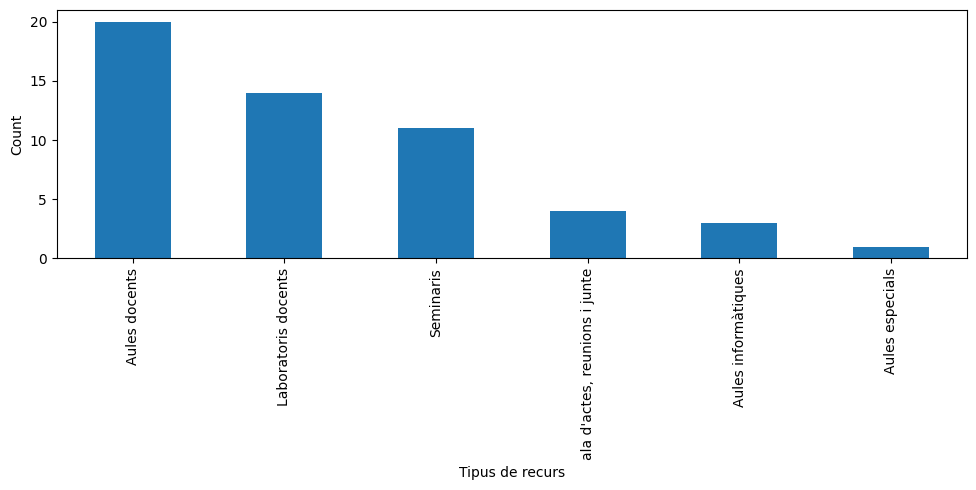

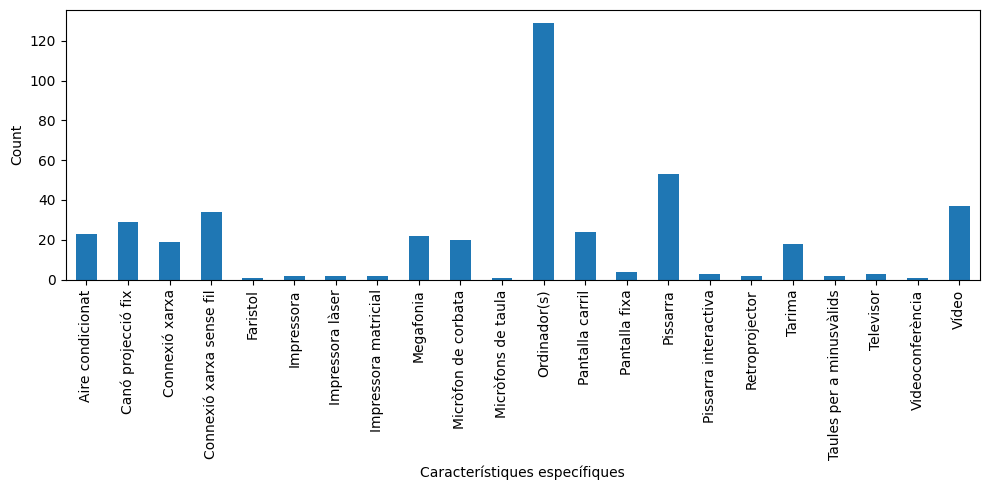

In [11]:
print(df.describe())


# Different "Tipus de recurs" there are, using a dataset in which the blank spaces were not filled
value_counts_0 = df["Tipus de recurs"].value_counts()
plt.figure(figsize=(10, 5))
value_counts_0.plot(kind="bar")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


# Amount of Característiques específiques that there are, their number is stored at the "Valor característiques específiques" column
grouped_counts = df.groupby("Característiques específiques")["Valor característiques específiques"].sum()
plt.figure(figsize=(10, 5))
grouped_counts.plot(kind='bar')
plt.ylabel("Count")
plt.xticks(rotation=90) # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from being cut off
plt.show()